In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
names = 'Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'
names = names.split(',')
df = pd.read_csv('./../wine/wine.data', names=names)
df

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


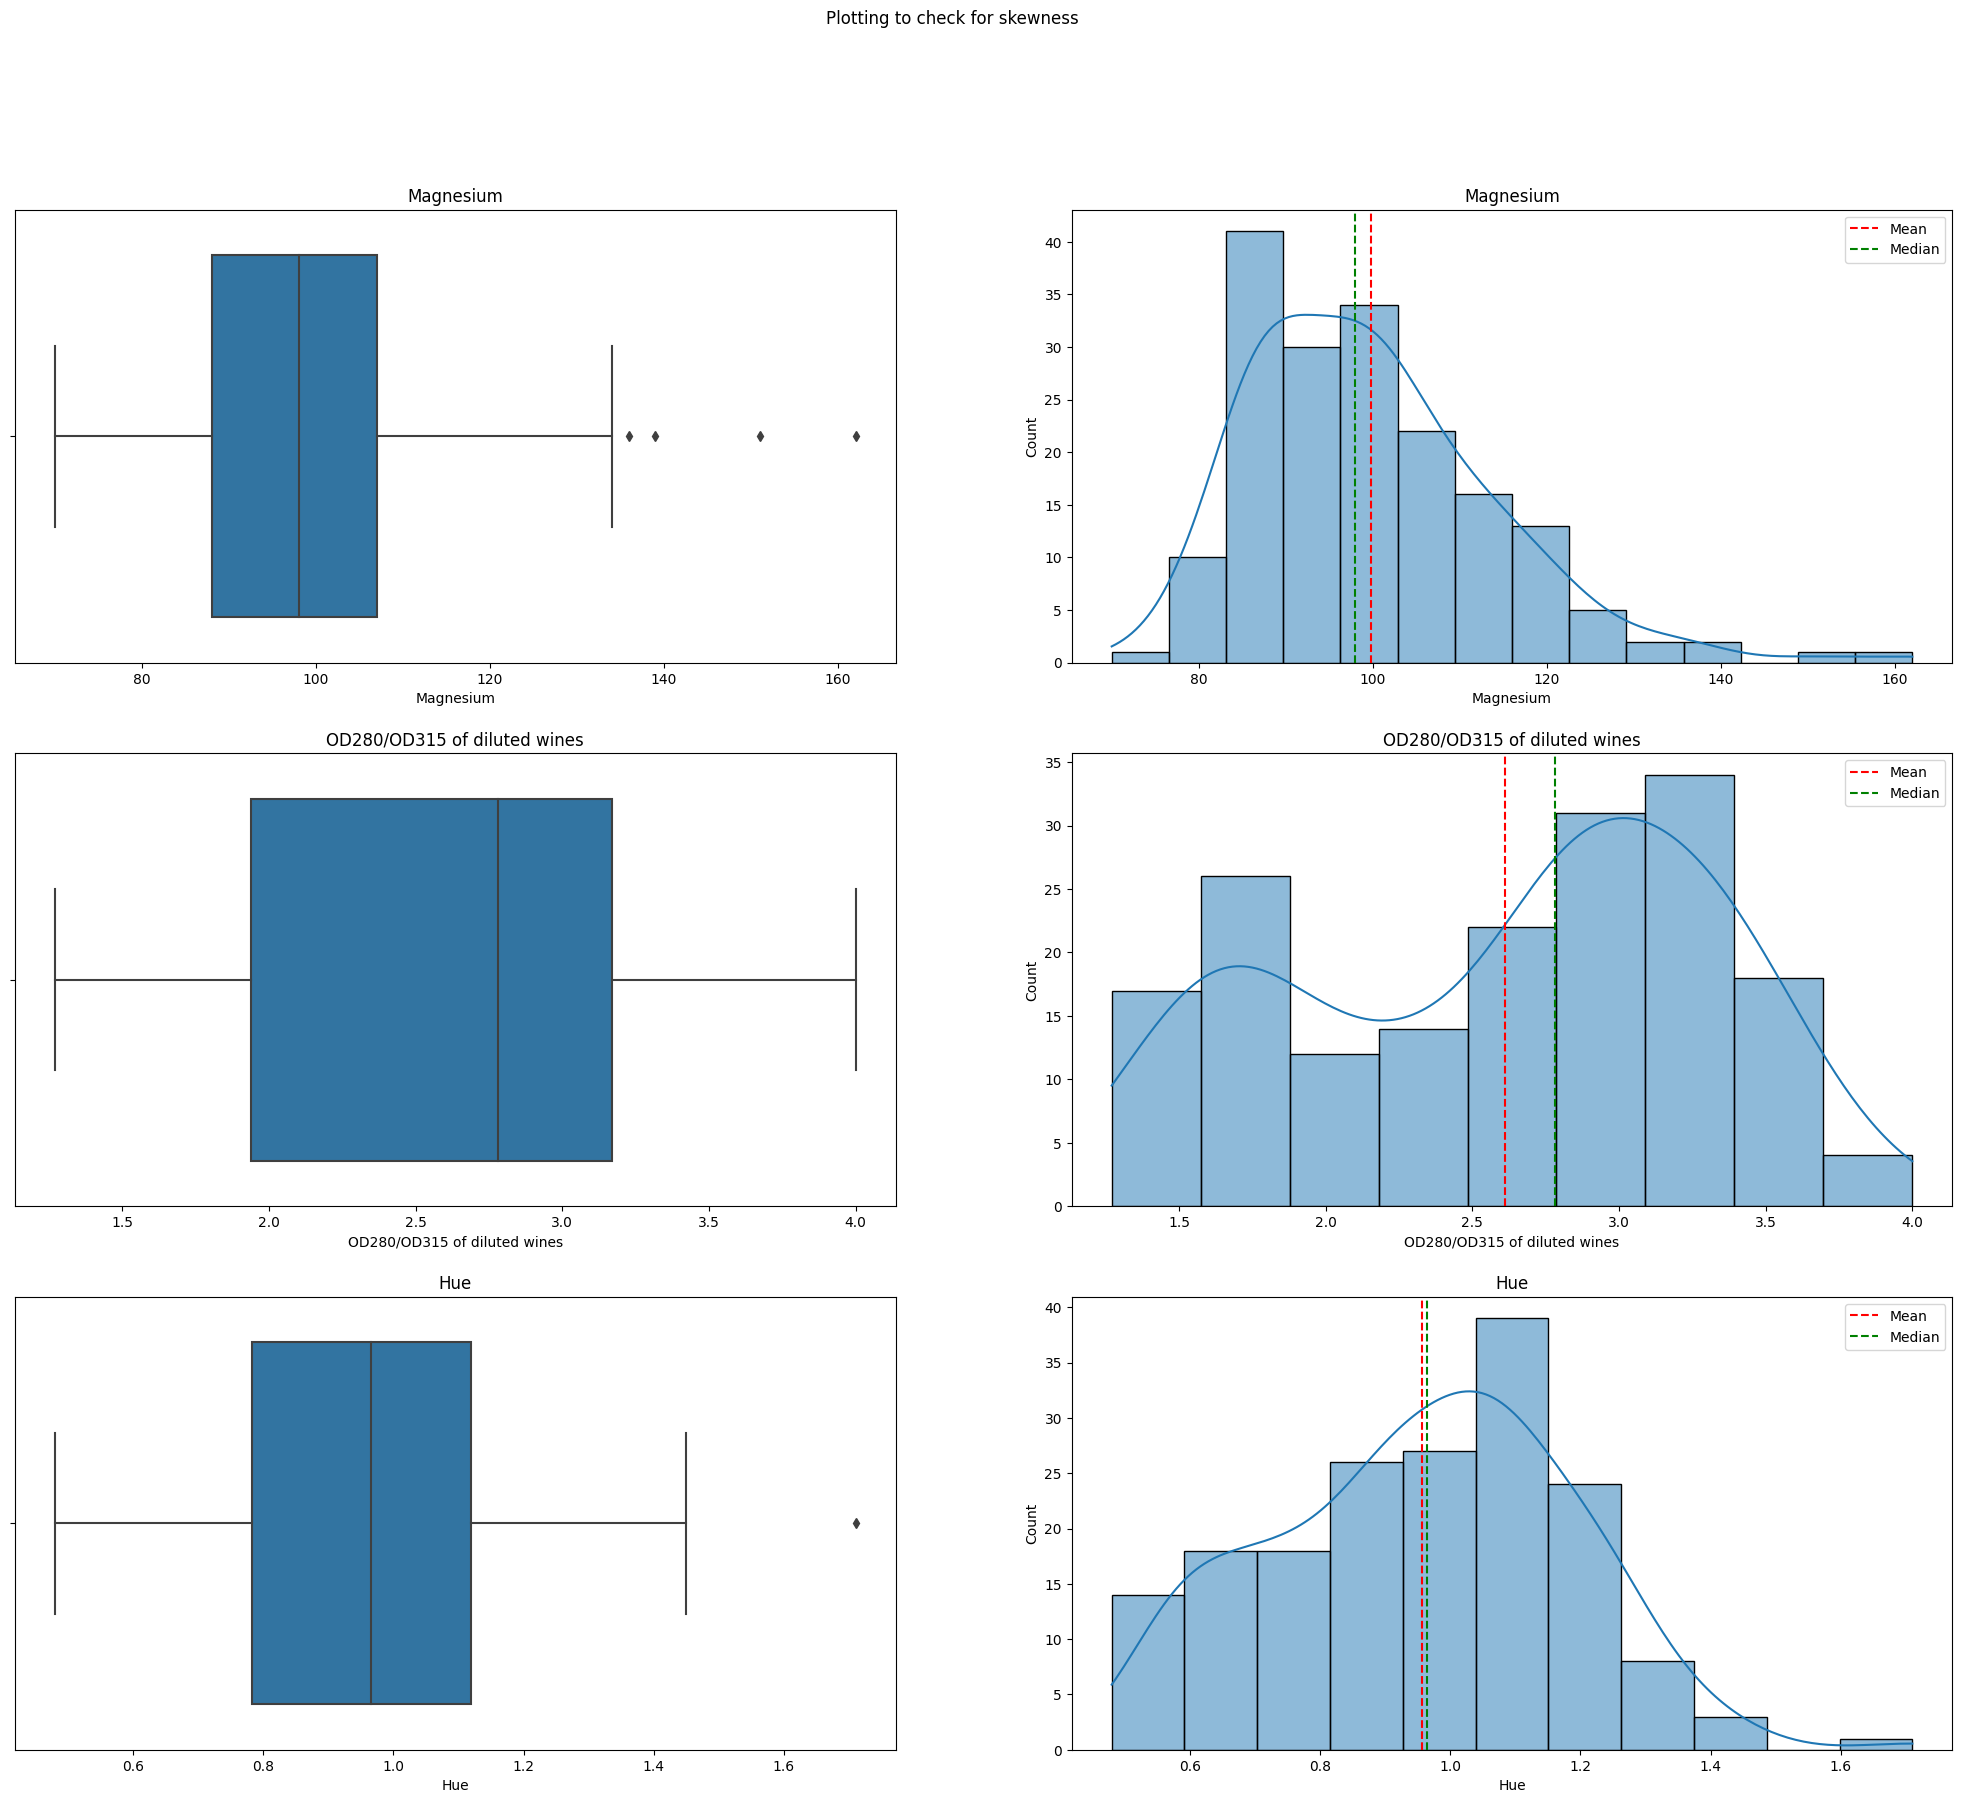

In [56]:
fig, ax = plt.subplots(figsize=(25,20), nrows=3, ncols=2)
fig.suptitle('Plotting to check for skewness')
ax[0,0].set_title('Magnesium')
ax[0,1].set_title('Magnesium')
sns.boxplot(df, x='Magnesium', ax=ax[0,0])
sns.histplot(df['Magnesium'], kde=True, ax=ax[0,1])
ax[0,1].axvline(x=df['Magnesium'].mean(), c='r', ls='dashed', label='Mean')
ax[0,1].axvline(x=df['Magnesium'].median(), c='green', ls='dashed', label='Median')
ax[0,1].legend()

ax[1,0].set_title('OD280/OD315 of diluted wines')
ax[1,1].set_title('OD280/OD315 of diluted wines')
sns.boxplot(df, x='OD280/OD315 of diluted wines', ax=ax[1,0])
sns.histplot(df['OD280/OD315 of diluted wines'], kde=True, ax=ax[1,1])
ax[1,1].axvline(x=df['OD280/OD315 of diluted wines'].mean(), c='r', ls='dashed', label='Mean')
ax[1,1].axvline(x=df['OD280/OD315 of diluted wines'].median(), c='green', ls='dashed', label='Median')
ax[1,1].legend()

ax[2,0].set_title('Hue')
ax[2,1].set_title('Hue')
sns.boxplot(df, x='Hue', ax=ax[2,0])
sns.histplot(df['Hue'], kde=True, ax=ax[2,1])
ax[2,1].axvline(x=df['Hue'].mean(), c='r', ls='dashed', label='Mean')
ax[2,1].axvline(x=df['Hue'].median(), c='green', ls='dashed', label='Median')
ax[2,1].legend()

plt.savefig('./my_plot.png')
plt.show()



### Measure of skewness

if skew is negative, it is left skewed.<br>
O => symmetric/almost symmetric<br>
positive => right skewed

In [38]:
for col in df:
    print(f'{col}: {df[col].skew()}')

Class: 0.10743112358094281
Alcohol: -0.051482331077134784
Malic Acid: 1.0396511925814442
Ash: -0.17669931645735712
Alcalinity of ash: 0.21304688642645586
Magnesium: 1.098191054755161
Total Phenols: 0.08663858640245253
Flavanoids: 0.02534355338149103
Nonflavanoid phenols: 0.4501513355621236
Proanthocyanins: 0.5171371722998975
Color intensity: 0.8685847909572548
Hue: 0.021091272199709302
OD280/OD315 of diluted wines: -0.30728549895848106
Proline: 0.7678217813897322


Q: Try normalize Magnesium using x^0.5 and log x

Text(0.5, 1.0, '-0.17656461729558018')

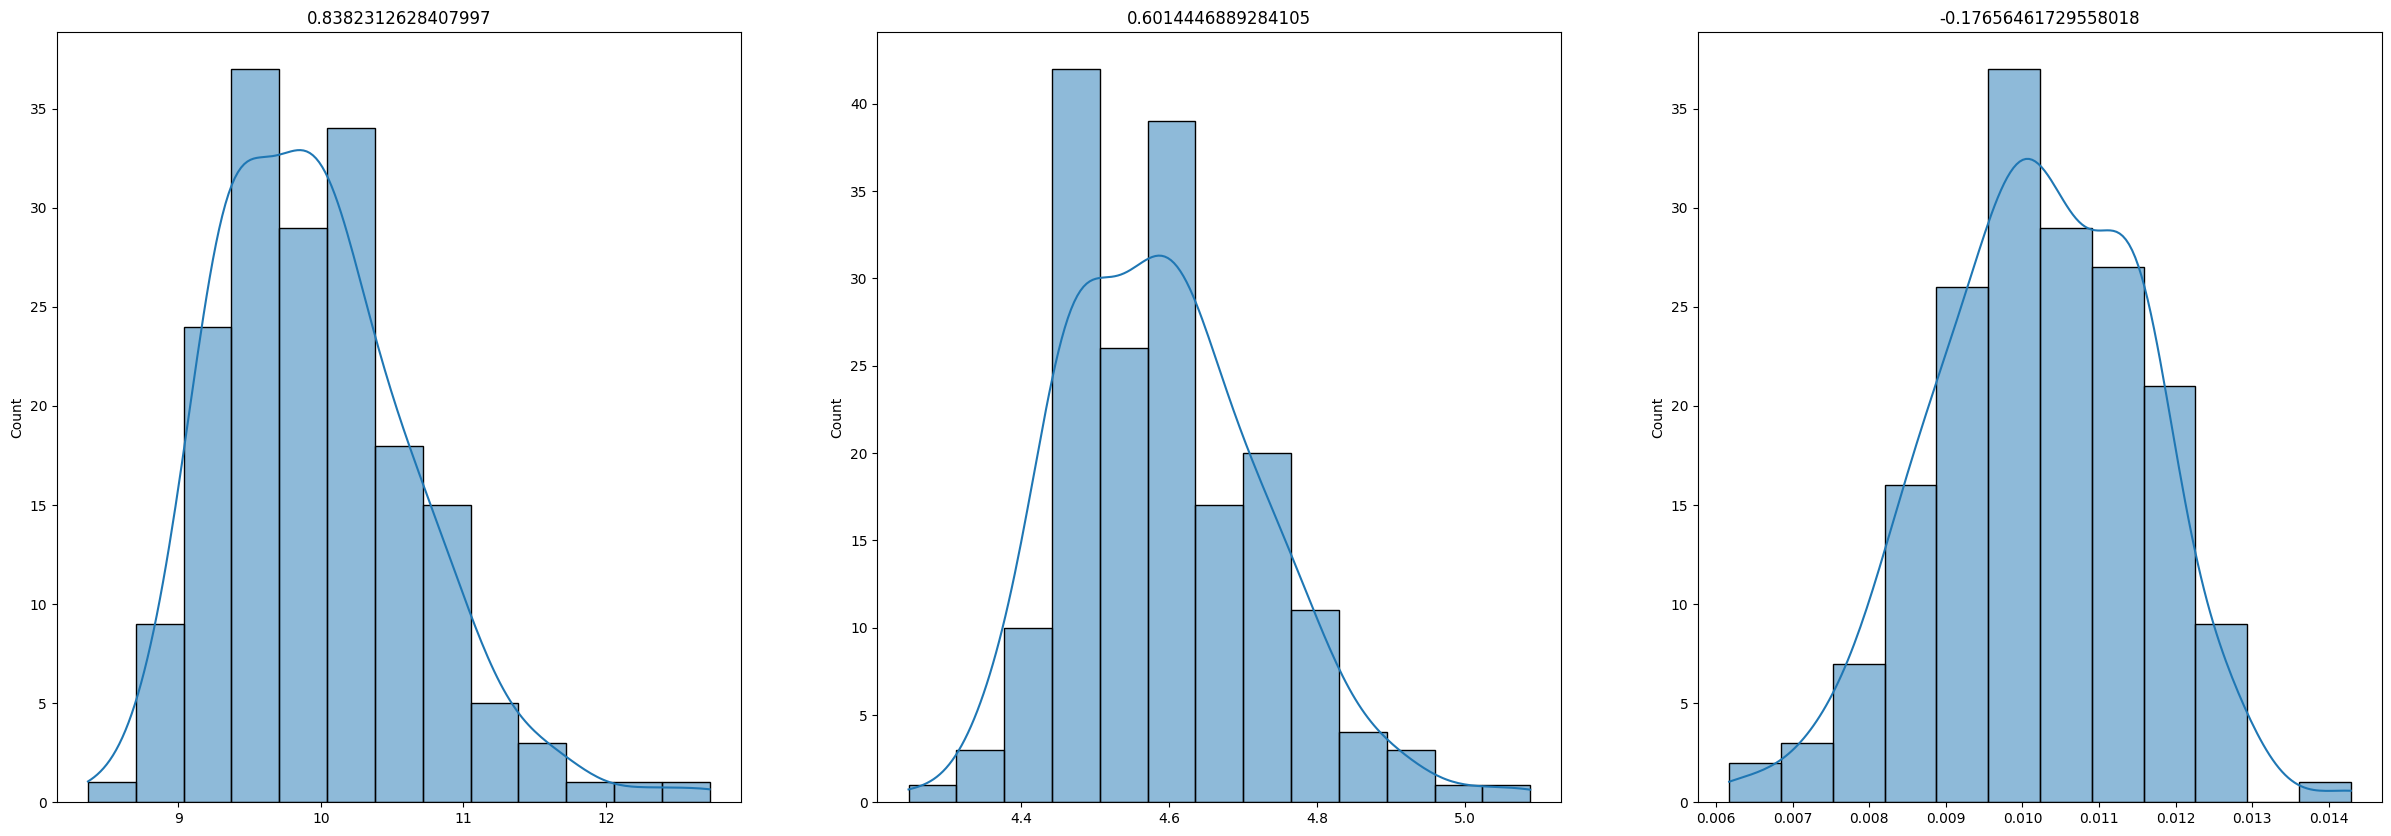

In [73]:
mag1 = pd.Series([np.sqrt(x) for x in df['Magnesium']])
mag2 = pd.Series([np.log(x) for x in df['Magnesium']])
mag3 = pd.Series([1/x for x in df['Magnesium']])

fig, ax = plt.subplots(1,3, figsize=(30,10))

sns.histplot(mag1, kde=True, ax=ax[0])
sns.histplot(mag2, kde=True, ax=ax[1])
sns.histplot(mag3, kde=True, ax=ax[2])
ax[0].set_title(mag1.skew())
# ax[0].legend()
ax[1].set_title(mag2.skew())
ax[2].set_title(mag3.skew())


# BoxCox transfromation

$$
f(x) = \frac{x^\lambda - 1}{\lambda}

Text(0.5, 1.0, 'skew=0.0063529133891043485')

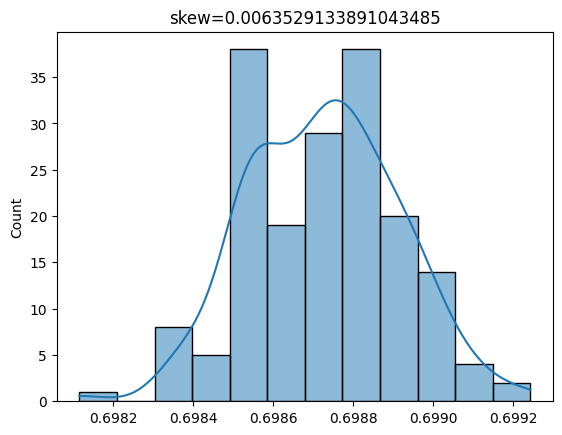

In [88]:
mag4 = pd.Series(stats.boxcox(df['Magnesium'])[0])
sns.histplot(mag4, kde=True)
plt.title(f'skew={mag4.skew()}')

Text(0.5, 1.0, '0.0063529133891043485')

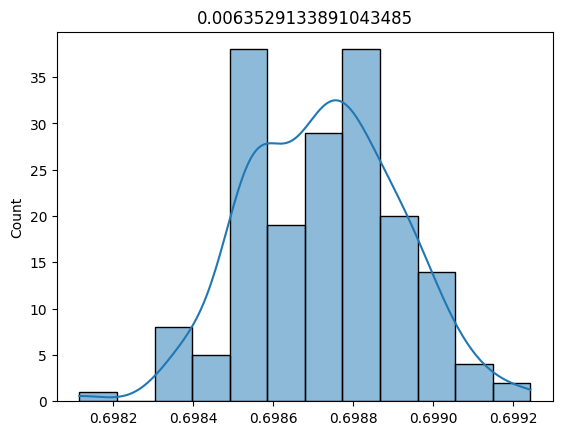

In [86]:
lam = stats.boxcox(df['Magnesium'])[1]
f = lambda x: (x**lam - 1)/lam
mag5 = pd.Series([f(x) for x in df['Magnesium']])
sns.histplot(mag5, kde=True)
plt.title(mag5.skew())

# QQ Plot

Break data into N pieces.

These pieces are called quantiles.

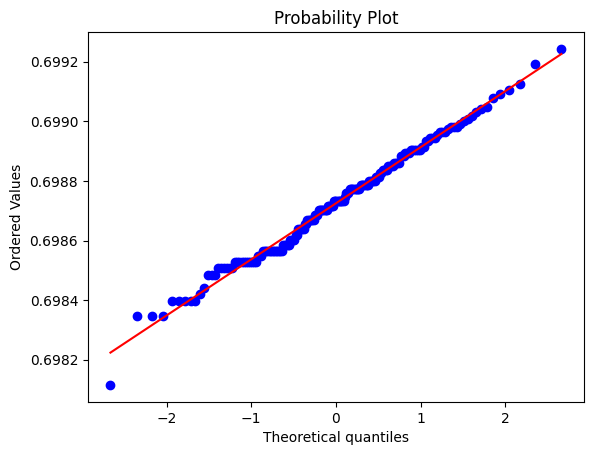

In [98]:
# from seaborn_qqplot import pplot

stats.probplot(mag4, plot=plt)

plt.show()